# Building Blocks of LangGraph

- An application in LangGraph starts from an entrypoint and depending on the execution, the flow may go to one function or another until it reaches the END.

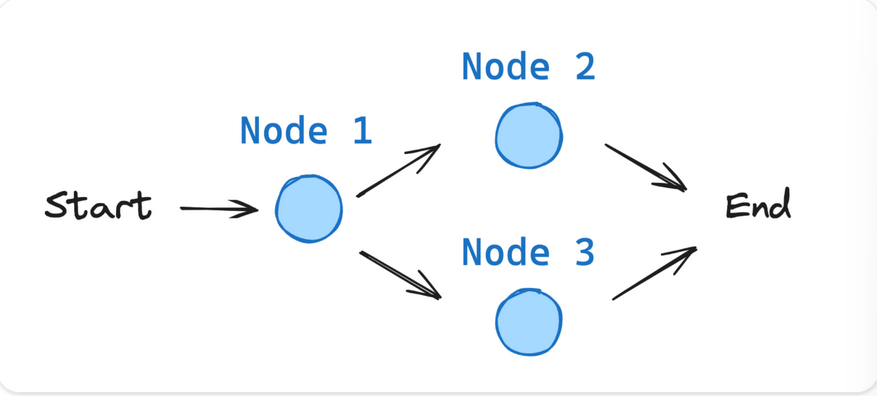


1. State

- State is the central concept. It represents all the informations that flows through your application.
- The state is user defined.

2. Nodes

- Nodes are python functions. Each node:
  - Takes the state as input
  - Performs some operation
  - Returns updates to the state
- Nodes can contain:
  - LLM calls: Generate text or make decisions
  - Tool calls: Interact with external systems
  - conditional logic: Determine next steps
  - Human Intervention: Get input from users


In [7]:
from typing_extensions import TypedDict
import random
from typing import Literal
class State(TypedDict):
    graph_state: str
def node_1(state):
    print("---Node 1---")
    return {"graph_state":state["graph_state"]+" I am"}
def node_2(state):
    print("---Node 2---")
    return {"graph_state":state["graph_state"]+" happy!"}
def node_3(state):
    print("---Node 3---")
    return {"graph_state": state['graph_state']+" sad!"}
def decide_mood(state)->Literal["node_2","node_3"]:
    user_input=state['graph_state']
    if random.random()<0.5:
        return "node_2"
    return "node_3"

3. Edges

- Edges connect nodes and define the possible paths through your graph.
- Edges can be:
  - Direct: Always go from node A to node B
  - Conditional: Choose the next node based on the current state

4. StateGraph

- The StateGraph is the container that holds your entire agent workflow:


In [8]:
from IPython.display import Image, display
from langgraph.graph import StateGraph, START,END

builder=StateGraph(State)
builder.add_node("node_1",node_1)
builder.add_node("node_2",node_2)
builder.add_node("node_3",node_3)
builder.add_edge(START,"node_1")
builder.add_conditional_edges("node_1",decide_mood)
builder.add_edge("node_2",END)
builder.add_edge("node_3",END)
graph=builder.compile()

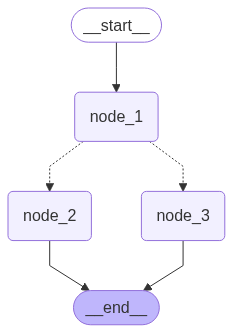

In [9]:
display(Image(graph.get_graph().draw_mermaid_png()))

In [14]:
graph.invoke({"graph_state":"Hi, this is Lance."})

---Node 1---
---Node 2---


{'graph_state': 'Hi, this is Lance. I am happy!'}